Proje Tanımı:

-Aynı ilçede bulunmayan birbirine en yakın iki büfenin bilgilerini (İlçe, Mahalle, Büfe Adları) yazdırma.


-İlçe başına büfe sayısını pasta grafiği şeklinde çizdirme


In [56]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt



In [29]:
data = pd.read_excel("/Users/macbookair/Desktop/KaggleProjeleri/ihe-bufelerinin-konumlari.xls")
data.head()

,Büfe Adı,İlçe,Mahalle,x,y
0,PAŞA BÜFE,ARNAVUTKÖY,FATİH MAH,41.224207,28.692898
1,GELİBOLU BÜFE,ARNAVUTKÖY,ATATÜRK,41.189718,28.756746
2,SIDDIK CAMİ BÜFE,ARNAVUTKÖY,MUSTAFA KEMAL PAŞA,41.195236,28.729544
3,ARNAVUTKÖY HASTANE BÜFE,ARNAVUTKÖY,MERKEZ MAH,41.178354,28.746968
4,AVLU 34 AVM BÜFE,ARNAVUTKÖY,MERKEZ MAH,41.184028,28.735723


In [39]:
data.dtypes

Büfe Adı    object
İlçe        object
Mahalle     object
x           object
y           object
dtype: object

In [41]:
data.x = data.x.str.replace(",",".").astype(float)
data.y = data.y.str.replace(",",".").astype(float)

In [42]:
data.dtypes

Büfe Adı     object
İlçe         object
Mahalle      object
x           float64
y           float64
dtype: object

In [45]:
data[data["İlçe"].str.contains("MALTEPE")]

,Büfe Adı,İlçe,Mahalle,x,y
416,BAŞIBÜYÜK BÜFE,MALTEPE,BAŞIBÜYÜK,41.156334,29.095049
417,TUGAYYOLU BÜFE,MALTEPE,CEVİZLİ,40.915238,29.149474
418,ALTINTEPE BÜFE,MALTEPE,ALTINTEPE,40.954772,29.105529
419,DOĞUŞKENT BÜFE,MALTEPE,GİRNE,40.939214,29.135345
420,ESENKENT BÜFE,MALTEPE,ESENKENT,40.926805,29.167917
421,MALTEPE KORUMA BÜFE,MALTEPE,CEVİZLİ,40.917456,29.144254
422,ZÜMRÜTEVLER BÜFE,MALTEPE,ZÜMRÜTEVLER,40.942655,29.150453
423,FINDIKLI MERKEZ BÜFE,MALTEPE,FINDIKLI,40.968807,29.122977
424,KÜÇÜKYALI BÜFE,MALTEPE,KÜÇÜKYALI,40.946628,29.111295
425,MALTEPE PARK BÜFE,MALTEPE,BAĞLARBAŞI,40.925455,29.129916


In [43]:
def uzaklikHesapla(x1,y1,x2,y2):
    return sqrt((x2-x1) ** 2 + (y2-y1) ** 2)

In [51]:
data["Büfe Adı"][0]
data.x[0]

41.224207

In [54]:
bufe1  =""
bufe2 = ""
en_yakin = 100000
for i in range(data.shape[0]):
    for j in range(data.shape[0]):
        if (data["Büfe Adı"][i] != data["Büfe Adı"][j]) & ( data["İlçe"][i] != data["İlçe"][j]):
            uzaklik = uzaklikHesapla(data.x[i],data.y[i],data.x[j],data.y[j])
            if uzaklik < en_yakin:
                en_yakin = uzaklik
                bufe1 = data.iloc[i]
                bufe2 = data.iloc[j]
print(bufe1)
print(bufe2)

Büfe Adı    KOZYATAĞI METRO BÜFE
İlçe                    ATAŞEHİR
Mahalle                İÇERENKÖY
x                      40.906205
y                      29.210137
Name: 29, dtype: object
Büfe Adı    KARTAL METRO BÜFE
İlçe                   KARTAL
Mahalle              ESENTEPE
x                   40.906157
y                   29.210137
Name: 351, dtype: object


İlçe başına düşen büfe sayısının pasta grafiğini çizdirelim.


<AxesSubplot:ylabel='Büfe Adı'>

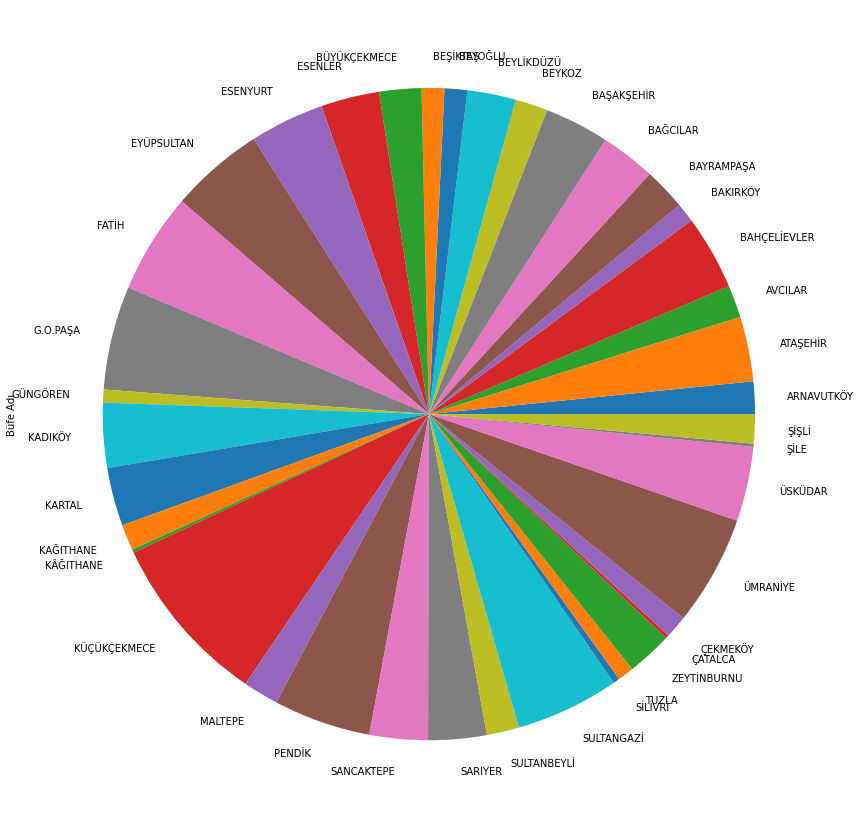

In [58]:
fig = plt.gcf()
fig.set_size_inches(15,15)

data.groupby("İlçe")["Büfe Adı"].count().plot.pie()

